Step 1: Import Required Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


Step 2: Load the Dataset

In [2]:
data = pd.read_csv('netflix1.csv')
data['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

# First five rows

In [4]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


# Last five rows

In [5]:
data.tail()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


Step 3: Data Cleaning

# Checking Null Values 

In [6]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

# checking duplicates 

In [7]:
data.duplicated().any()

np.False_

In [8]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

# droping duplicates if any

In [9]:
data.drop_duplicates(inplace= True)

In [10]:
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


# Dropping missing values 

In [11]:
data.dropna(subset=['director','country'],inplace=True)

In [12]:
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


# Converting date_added to datetime
# not the changing the column name but converting it to datetime function so can extract year month and date

In [13]:
data['date_added']= pd.to_datetime(data['date_added'])

In [14]:
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV


# checking the changes of the date time 

In [15]:
print(data.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


# Exploratory Data Analysis (EDA)

# 1.Counting how many movies and tv shows are there

In [17]:
type_counts = data['type'].value_counts()
type_counts

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

# Plotting the distribution

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6948\3975886334.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette= 'coolwarm')


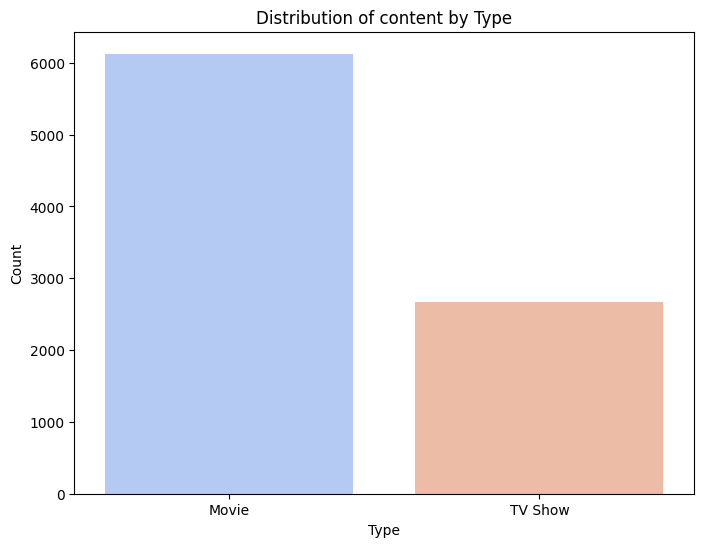

In [18]:
plt.figure(figsize=(8,6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette= 'coolwarm')
plt.title("Distribution of content by Type")
plt.xlabel("Type")
plt.ylabel('Count')
plt.show()

In [19]:
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV


# 2. Most Common Genres

#  Split the 'listed_in' column and count genres

In [21]:
data['genres']= data['listed_in'].apply(lambda x: x.split(','))
all_genres= sum(data['genres'],[])        #sum(data['genres'], []): This flattens all the lists in the genres column into one single list.
genre_counts= pd.Series(all_genres).value_counts().head(10)   #pd.Series(all_genres): This converts the all_genres list into a pandas Series, which makes it easier to count the occurrences of each genre.
genre_counts


 International Movies     2624
Dramas                    1599
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     773
 Independent Movies        736
 TV Dramas                 695
 Romantic Movies           613
Name: count, dtype: int64

# Plot the most common genres

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6948\3841649128.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values,y=genre_counts.index, palette= 'Set3')


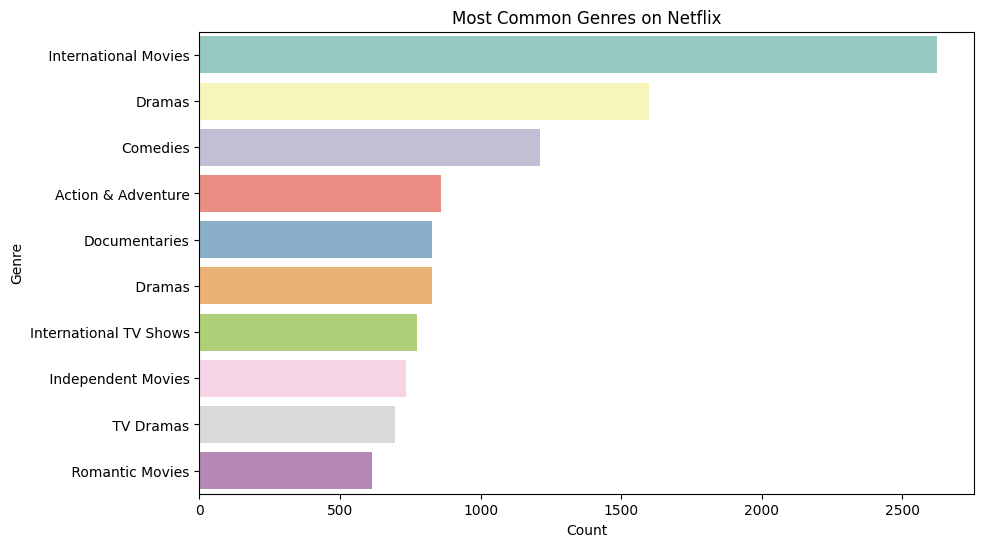

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values,y=genre_counts.index, palette= 'Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# 3.Content Added Over Time 

# Extracting year and month from 'date_added'

In [24]:
data['year_added']= data['date_added'].dt.year
data['month_added']= data['date_added'].dt.month


# Plotting content added over the years

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6948\1534646723.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added',data=data,palette='coolwarm')


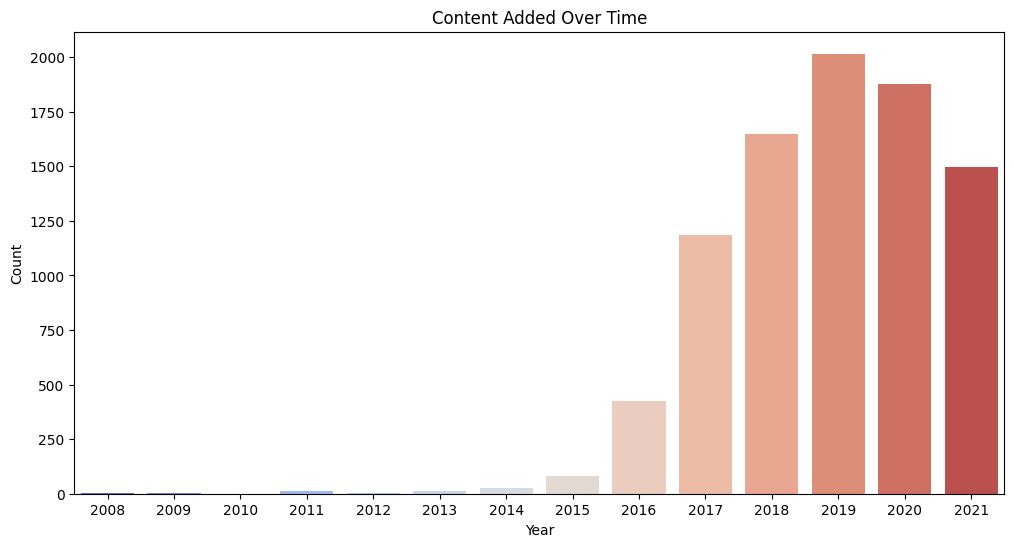

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(x='year_added',data=data,palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# 4. Top 10 Directors with the Most Titles

# dropping all rows where the director = 'Not Given' and Creating temporary filtered DataFrame for the Insight of Top Director


In [26]:
temp_data = data[data['director'] != 'Not Given']
temp_data


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,[Documentaries],2021,9
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","[Crime TV Shows, International TV Shows, TV ...",2021,9
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","[TV Dramas, TV Horror, TV Mysteries]",2021,9
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies","[Children & Family Movies, Comedies]",2021,9
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","[Dramas, Independent Movies, International M...",2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6565,s3351,Movie,True: Grabbleapple Harvest,"Mark Thornton, Todd Kauffman",Canada,2019-11-01,2019,TV-Y,24 min,Children & Family Movies,[Children & Family Movies],2019,11
6566,s3509,Movie,True: Tricky Treat Day,"Mark Thornton, Todd Kauffman",Canada,2019-09-20,2019,TV-Y,24 min,Children & Family Movies,[Children & Family Movies],2019,9
6567,s3554,TV Show,True and the Rainbow Kingdom,"Mark Thornton, Todd Kauffman",United States,2019-08-30,2019,TV-Y,3 Seasons,Kids' TV,[Kids' TV],2019,8
6568,s4241,Movie,Sam Kinison: The Scream Continues,Walter C. Miller,United States,2018-12-31,2016,TV-MA,29 min,Documentaries,[Documentaries],2018,12


In [28]:
top_directors= temp_data['director'].value_counts().head(10)
top_directors

director
Rajiv Chilaka             20
Raúl Campos, Jan Suter    18
Alastair Fothergill       18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Name: count, dtype: int64

# Plotting top directors

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6948\2316609105.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')


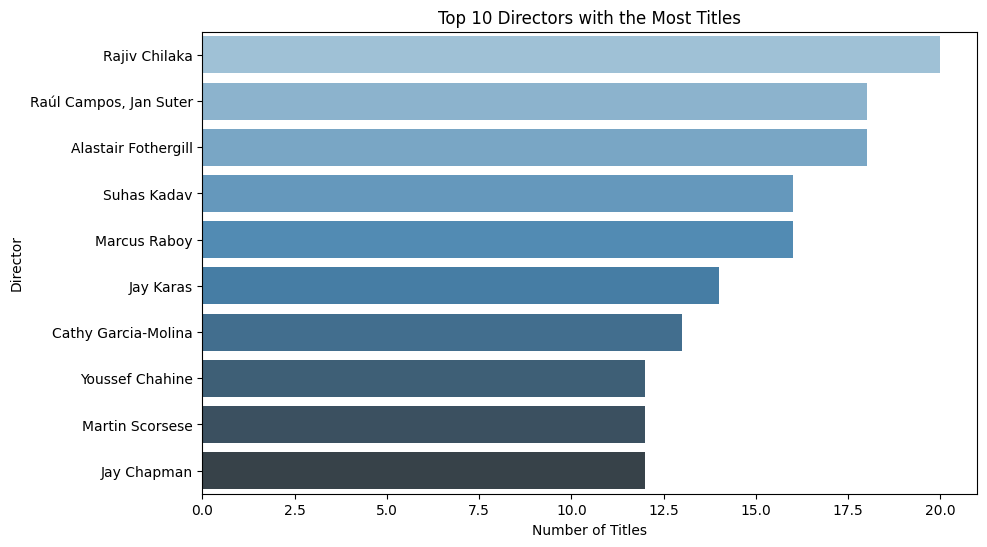

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

# 5. Word Cloud of Movie Titles

# Generating word cloud

In [30]:
movie_titles = data[data['type'] == 'Movie'] ['title']
wordCloud = WordCloud(width= 800 , height= 400, background_color= 'black').generate(' '.join(movie_titles))

# Plotting Word Cloud

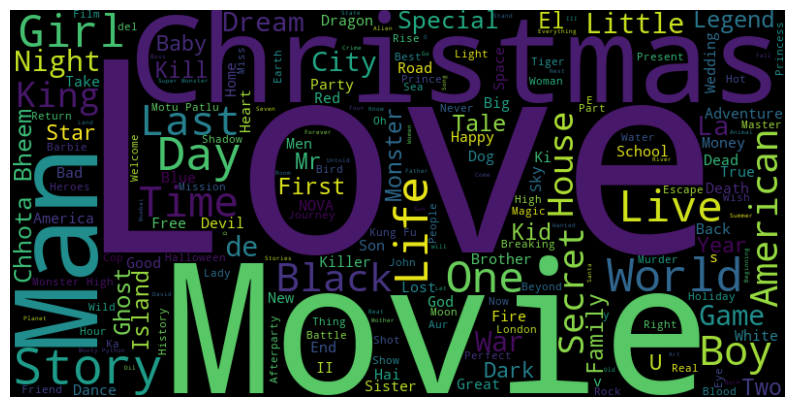

In [31]:
plt.figure(figsize=(10,6))
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

# Step 5: Conclusion and Insights

Till Now:
1. Cleaned the data by handling missing values, removing duplicates, and
converting data types.
2. Explored the data through various visualizations such as bar plots and word
clouds.
3. Analyzed content trends over time, identified popular genres, and highlighted
top directors.

# Step 6: Upcoming 

1. Feature Engineering: Create new features, such as counting the number of
genres per movie or extracting the duration in minutes.
2. Machine Learning: Use the cleaned and processed data to build models for
recommendations or trend predictions.
3. Advanced Visualization: Use interactive plots or dashboards for more detailed
analysis.

In [32]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,[Documentaries],2021,9
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","[Crime TV Shows, International TV Shows, TV ...",2021,9
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","[TV Dramas, TV Horror, TV Mysteries]",2021,9
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies","[Children & Family Movies, Comedies]",2021,9
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","[Dramas, Independent Movies, International M...",2021,9


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
 10  genres        8790 non-null   object        
 11  year_added    8790 non-null   int32         
 12  month_added   8790 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(9)
memory usage: 824.2+ KB


In [34]:
data.shape

(8790, 13)

In [37]:
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,[Documentaries],2021,9
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","[Crime TV Shows, International TV Shows, TV ...",2021,9
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","[TV Dramas, TV Horror, TV Mysteries]",2021,9
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies","[Children & Family Movies, Comedies]",2021,9
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","[Dramas, Independent Movies, International M...",2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","[International TV Shows, TV Dramas]",2017,1
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,[Kids' TV],2018,9
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","[International TV Shows, Romantic TV Shows, ...",2016,12
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,[Kids' TV],2018,6


# Content distribution on Netflix

In [38]:
data['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

In [39]:
freq= data['type'].value_counts()

In [40]:
freq

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6948\2837574318.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data , x=data['type'],ax=axes[0],palette='coolwarm')


Text(0.5, 0.98, 'Total Content On Netflix')

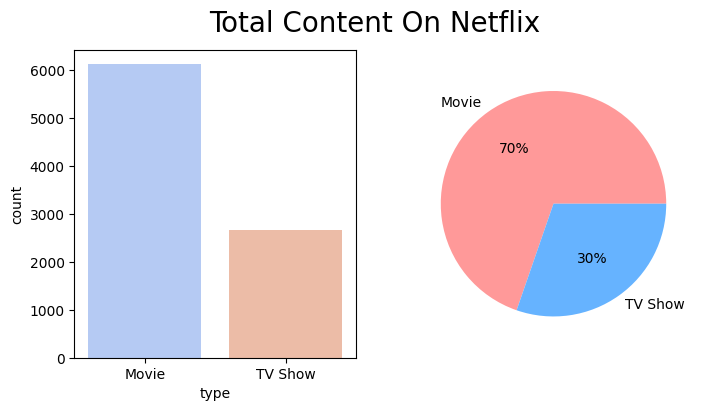

In [42]:
fig, axes= plt.subplots(1,2, figsize=(8,4))
colors = ['#ff9999', '#66b3ff']
sns.countplot(data = data , x=data['type'],ax=axes[0],palette='coolwarm')
plt.pie(freq,labels=freq.index,autopct='%.0f%%',colors=colors)
plt.suptitle('Total Content On Netflix',fontsize= 20)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
 10  genres        8790 non-null   object        
 11  year_added    8790 non-null   int32         
 12  month_added   8790 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(9)
memory usage: 824.2+ KB


# Visual representation of rating frequency of movies and TV Shows on Netflix

In [44]:
data['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [45]:
ratings= data['rating'].value_counts().reset_index(name='count').sort_values(by='count',ascending=False)
ratings

,rating,count
0,TV-MA,3205
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490
5,TV-Y7,333
6,TV-Y,306
7,PG,287
8,TV-G,220
9,NR,79


Text(0.5, 0.98, 'Rating on Netflix')

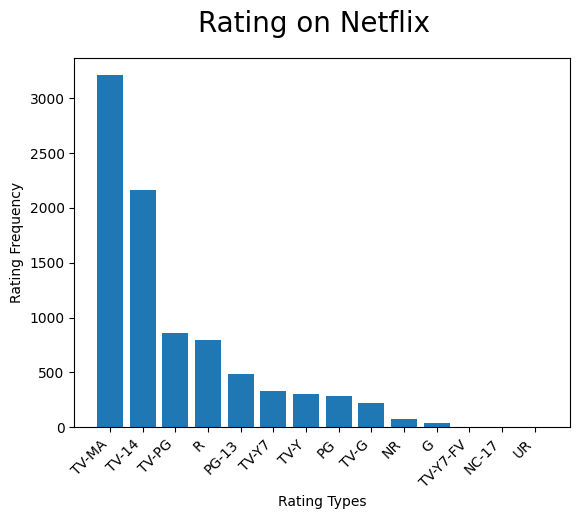

In [47]:
plt.bar(ratings['rating'],ratings['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Rating Types')
plt.ylabel('Rating Frequency')
plt.suptitle('Rating on Netflix',fontsize=20)

Text(0.5, 0.98, 'Rating on Netflix')

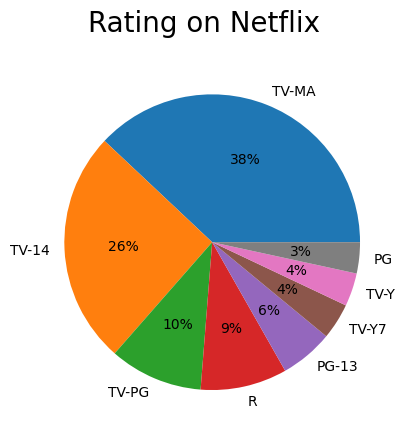

In [48]:
plt.pie(ratings['count'][:8],labels=ratings['rating'][:8],autopct='%.0f%%')
colors = ['#ff9999', '#66b3ff']
plt.suptitle('Rating on Netflix',fontsize=20)

In [49]:
data.describe()

,date_added,release_year,year_added,month_added
count,8790,8790.000000,8790.000000,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163,2018.873606,6.655859
min,2008-01-01 00:00:00,1925.000000,2008.000000,1.000000
25%,2018-04-06 00:00:00,2013.000000,2018.000000,4.000000
50%,2019-07-03 00:00:00,2017.000000,2019.000000,7.000000
75%,2020-08-19 18:00:00,2019.000000,2020.000000,10.000000
max,2021-09-25 00:00:00,2021.000000,2021.000000,12.000000
std,NaN,8.825466,1.573568,3.436103


# Top 10 countries with most content on Netflix

In [51]:
data['country'].value_counts()

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Luxembourg           1
Senegal              1
Belarus              1
Puerto Rico          1
Cyprus               1
Name: count, Length: 86, dtype: int64

# Dropping all the rows where country = 'Not Given' and Creating temporary filtered DataFrame for the Insight of Top Countries

In [52]:
temp_data1 = data[data['country']!= 'Not Given']
temp_data1

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,[Documentaries],2021,9
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","[Crime TV Shows, International TV Shows, TV ...",2021,9
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","[TV Dramas, TV Horror, TV Mysteries]",2021,9
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies","[Children & Family Movies, Comedies]",2021,9
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","[Dramas, Independent Movies, International M...",2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","[International TV Shows, TV Dramas]",2017,1
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,[Kids' TV],2018,9
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","[International TV Shows, Romantic TV Shows, ...",2016,12
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,[Kids' TV],2018,6


In [54]:
top_ten_countries = temp_data1['country'].value_counts().reset_index(name='count').sort_values(by='count',ascending=False)[:10]
top_ten_countries

,country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Canada,271
5,Japan,259
6,South Korea,214
7,France,213
8,Spain,182
9,Mexico,138


Text(0.5, 0.98, 'Top 10 countries with most content on Netflix')

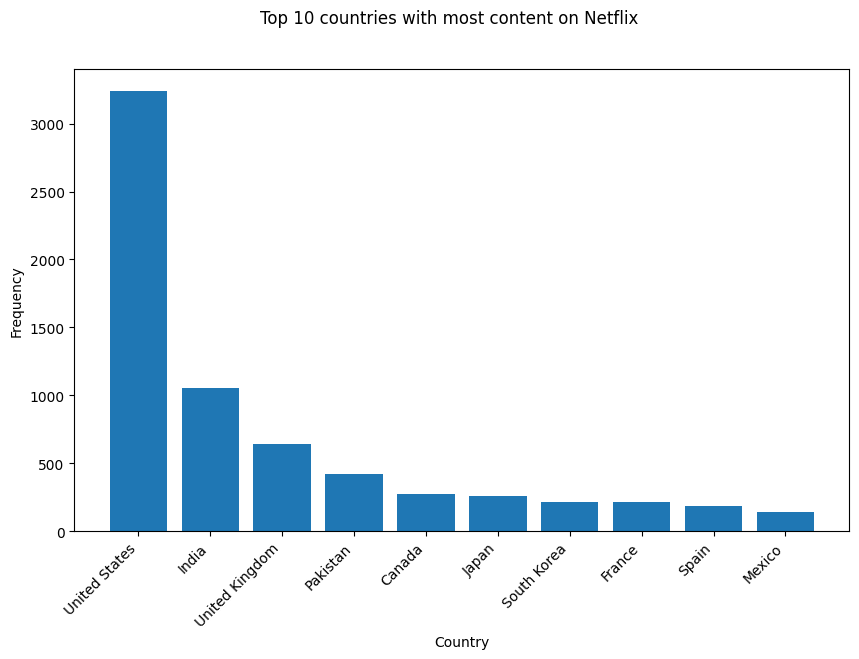

In [55]:
plt.figure(figsize=(10,6))
plt.bar(top_ten_countries['country'],top_ten_countries['count'])
plt.xticks(rotation=45,ha='right')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.suptitle('Top 10 countries with most content on Netflix')

In [57]:
data['year']=data['date_added'].dt.year
data['month']=data['date_added'].dt.month
data['day']=data['date_added'].dt.day


# Monthly releases of Movies and TV shows on Netflix

In [58]:
monthly_movies_release= data[data['type']=='Movie']['month'].value_counts().sort_index()
monthly_movies_release

month
1     545
2     382
3     528
4     549
5     439
6     492
7     565
8     518
9     518
10    545
11    498
12    547
Name: count, dtype: int64

In [59]:
monthly_series_release= data[data['type']== 'TV Show']['month'].value_counts().sort_index()
monthly_series_release

month
1     192
2     180
3     213
4     214
5     193
6     236
7     262
8     236
9     251
10    215
11    207
12    265
Name: count, dtype: int64

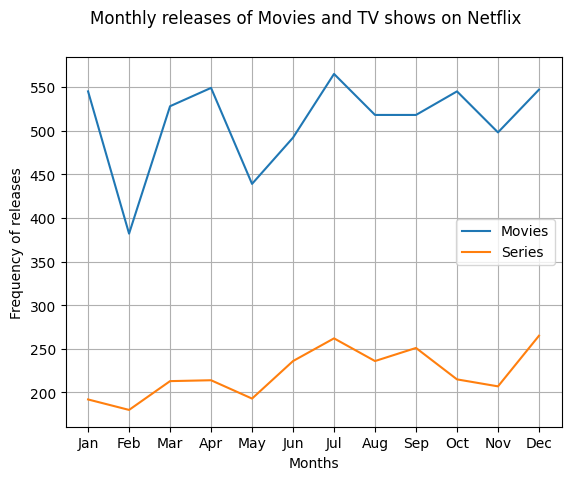

In [61]:
plt.plot(monthly_movies_release.index,monthly_movies_release.values,label='Movies')
plt.plot(monthly_series_release.index,monthly_series_release.values,label='Series')
plt.xlabel('Months')
plt.ylabel('Frequency of releases')
plt.xticks(range(1,13),['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.suptitle("Monthly releases of Movies and TV shows on Netflix")
plt.show()

# Yearly releases of Movies and TV Shows on Netflix

In [62]:
yearly_movies_release= data[data['type']=='Movie']['year'].value_counts().sort_index()
yearly_movies_release

year
2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      19
2015      56
2016     251
2017     836
2018    1237
2019    1424
2020    1284
2021     993
Name: count, dtype: int64

In [63]:
yearly_series_release= data[data['type']== 'TV Show']['year'].value_counts().sort_index()
yearly_series_release

year
2008      1
2013      5
2014      5
2015     26
2016    175
2017    349
2018    411
2019    592
2020    595
2021    505
Name: count, dtype: int64

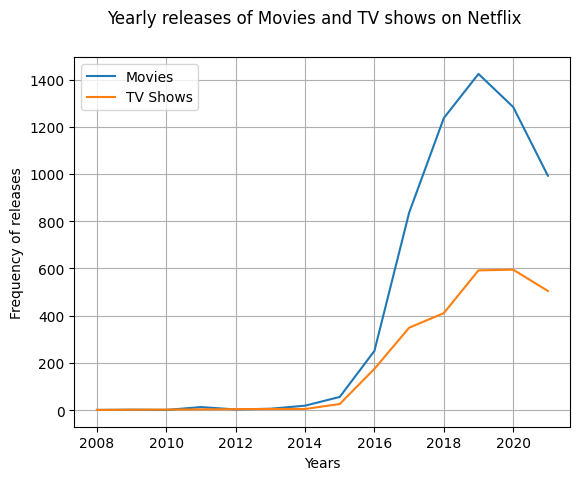

In [64]:
plt.plot(yearly_movies_release.index,yearly_movies_release.values,label='Movies')
plt.plot(yearly_series_release.index,yearly_series_release.values,label='TV Shows')
plt.xlabel('Years')
plt.ylabel('Frequency of releases')
plt.legend()
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV shows on Netflix")
plt.show()

# Top 10 popular movie genres

In [66]:
Popular_movie_genre= data[data['type']== 'Movie'].groupby('listed_in').size().sort_values(ascending=False)[:10]
Popular_movie_genre

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Comedies, International Movies                      176
dtype: int64

In [67]:
Popular_series_genre=data[data['type']=='TV Show'].groupby('listed_in').size().sort_values(ascending=False)[:10]
Popular_series_genre

listed_in
Kids' TV                                                  219
International TV Shows, TV Dramas                         121
Crime TV Shows, International TV Shows, TV Dramas         110
Kids' TV, TV Comedies                                      97
Reality TV                                                 95
International TV Shows, Romantic TV Shows, TV Comedies     94
International TV Shows, Romantic TV Shows, TV Dramas       90
Anime Series, International TV Shows                       87
Docuseries                                                 84
TV Comedies                                                68
dtype: int64

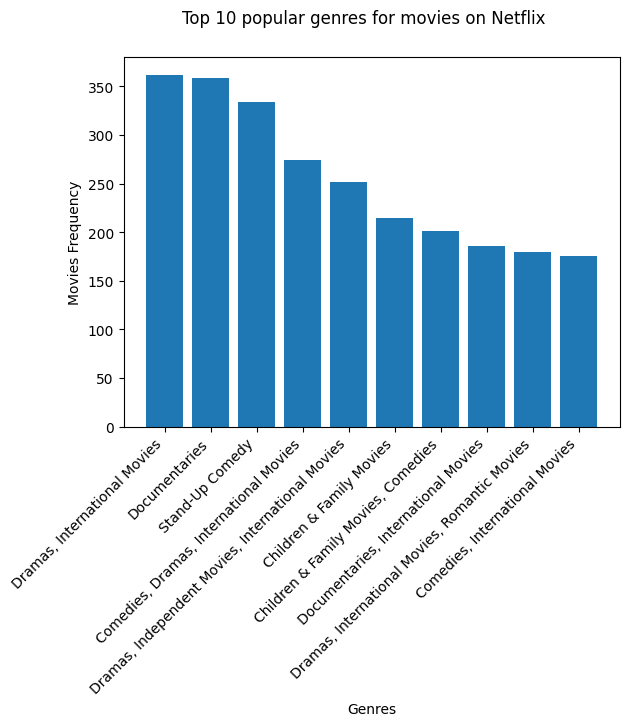

In [68]:
plt.bar(Popular_movie_genre.index,Popular_movie_genre.values)
plt.xticks(rotation=45,ha='right')
plt.xlabel('Genres')
plt.ylabel('Movies Frequency')
plt.suptitle('Top 10 popular genres for movies on Netflix')
plt.show()

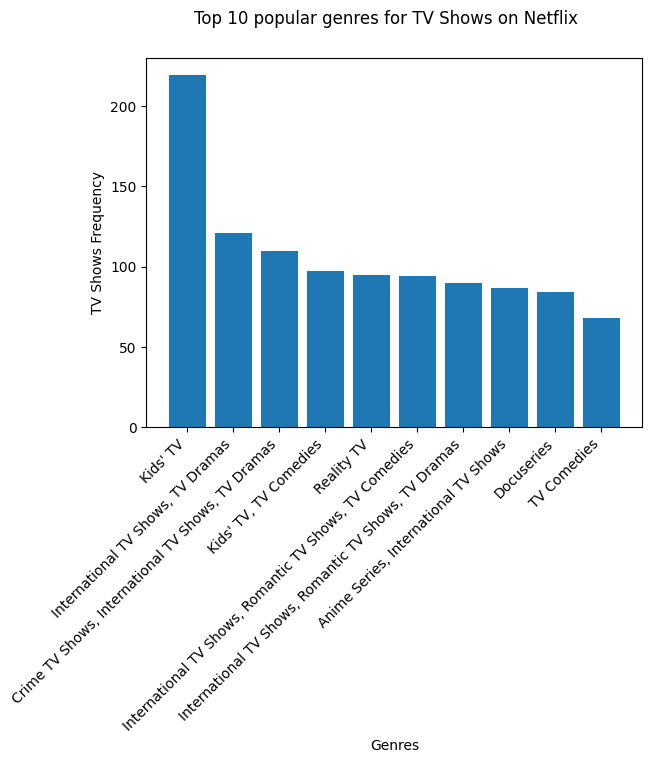

In [69]:
plt.bar(Popular_series_genre.index,Popular_series_genre.values)
plt.xticks(rotation=45,ha='right')
plt.xlabel('Genres')
plt.ylabel('TV Shows Frequency')
plt.suptitle('Top 10 popular genres for TV Shows on Netflix')
plt.show()

# Top 15 directors across Netflix with high frequency of movies and shows.

In [70]:
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres,year_added,month_added,year,month,day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,[Documentaries],2021,9,2021,9,25
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","[Crime TV Shows, International TV Shows, TV ...",2021,9,2021,9,24
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","[TV Dramas, TV Horror, TV Mysteries]",2021,9,2021,9,24
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies","[Children & Family Movies, Comedies]",2021,9,2021,9,22
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","[Dramas, Independent Movies, International M...",2021,9,2021,9,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","[International TV Shows, TV Dramas]",2017,1,2017,1,17
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,[Kids' TV],2018,9,2018,9,13
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","[International TV Shows, Romantic TV Shows, ...",2016,12,2016,12,15
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,[Kids' TV],2018,6,2018,6,23


In [71]:
data['director'].value_counts()

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Marcus Raboy                16
                          ... 
Mark Risley                  1
Kirati Nakintanon            1
Christian De Vita            1
Abu Bakr Shawky              1
N. Chandra                   1
Name: count, Length: 4528, dtype: int64

In [72]:
temp_data['director'].value_counts()

director
Rajiv Chilaka             20
Raúl Campos, Jan Suter    18
Alastair Fothergill       18
Suhas Kadav               16
Marcus Raboy              16
                          ..
Debra Granik               1
Storm Theunissen           1
Pascale Lamche             1
Mel Stuart                 1
Morgan Matthews            1
Name: count, Length: 4527, dtype: int64

In [74]:
directors= temp_data['director'].value_counts().reset_index(name='count').sort_values(by='count',ascending=False)[:15]
directors

,director,count
0,Rajiv Chilaka,20
1,"Raúl Campos, Jan Suter",18
2,Alastair Fothergill,18
4,Marcus Raboy,16
3,Suhas Kadav,16
5,Jay Karas,14
6,Cathy Garcia-Molina,13
7,Youssef Chahine,12
8,Martin Scorsese,12
9,Jay Chapman,12


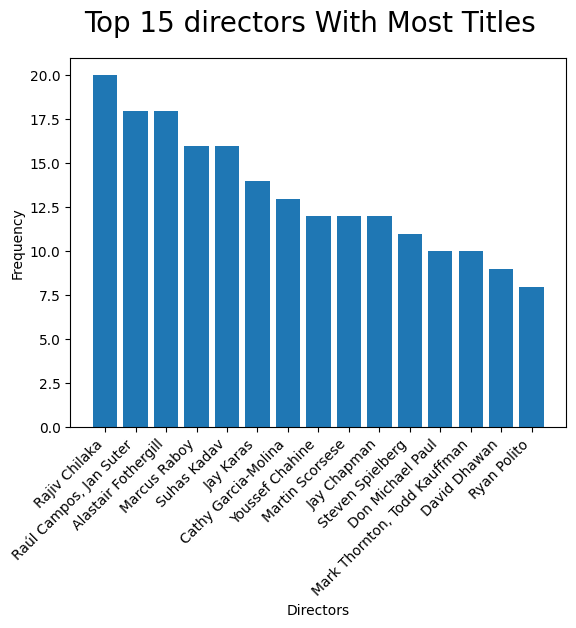

In [75]:
plt.bar(directors['director'],directors['count'])
plt.xticks(rotation=45,ha='right')
plt.xlabel("Directors")
plt.ylabel('Frequency')
plt.suptitle('Top 15 directors With Most Titles',fontsize=20)
plt.show()